In [1]:
import yfinance as yf


tesla = yf.Ticker("TSLA")
tesla_hist = tesla.history(period="5y") 
tesla_hist.head()




,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-13 00:00:00-04:00,39.344002,43.466667,38.702000,43.396667,337131000,0.0,0.0
2020-04-14 00:00:00-04:00,46.598000,49.458668,46.161999,47.326000,458647500,0.0,0.0
2020-04-15 00:00:00-04:00,49.466667,50.208668,47.333332,48.655334,353655000,0.0,0.0
2020-04-16 00:00:00-04:00,47.796001,50.630001,47.114666,49.680668,309868500,0.0,0.0
2020-04-17 00:00:00-04:00,51.485332,51.663334,49.844002,50.259335,196923000,0.0,0.0


In [2]:
!pip install lxml

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text  # <- Como pide la consigna

soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")

df = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        df = pd.read_html(str(table))[0]
        break

if df is not None:
    df.columns = ['Date', 'Revenue']
    df = df[df['Revenue'] != '']
    df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True)
    df['Revenue'] = pd.to_numeric(df['Revenue'])
    print(df.head())
else:
    print("❌ No se encontró la tabla con los ingresos de Tesla.")


         Date  Revenue
0  2022-09-30  21454.0
1  2022-06-30  16934.0
2  2022-03-31  18756.0
3  2021-12-31  17719.0
4  2021-09-30  13757.0


In [4]:
gamestop = yf.Ticker("GME")
gme_hist = gamestop.history(period="5y")
gme_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-13 00:00:00-04:00,1.0625,1.1900,1.0400,1.1850,27378000,0.0,0.0
2020-04-14 00:00:00-04:00,1.3025,1.6175,1.2850,1.4875,54026400,0.0,0.0
2020-04-15 00:00:00-04:00,1.4150,1.4175,1.2250,1.3175,29999600,0.0,0.0
2020-04-16 00:00:00-04:00,1.2800,1.3600,1.2200,1.2575,13487600,0.0,0.0
2020-04-17 00:00:00-04:00,1.3050,1.3200,1.1075,1.2200,22612800,0.0,0.0


In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
r = requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")

tables = soup.find_all("table")


df1 = pd.DataFrame()

for table in tables:
    if 'GameStop Quarterly Revenue' in table.text:
        df1 = pd.read_html(str(table))[0]
        break


if not df1.empty:
    df1.columns = ['Date', 'Revenue']
    df1 = df1[df1['Revenue'] != '']
    print(df1.head())
else:
    print("No se encontró la tabla de 'GameStop Quarterly Revenue'.")




         Date Revenue
0  2020-04-30  $1,021
1  2020-01-31  $2,194
2  2019-10-31  $1,439
3  2019-07-31  $1,286
4  2019-04-30  $1,548


AttributeError: 'America/New_York' object has no attribute 'update'

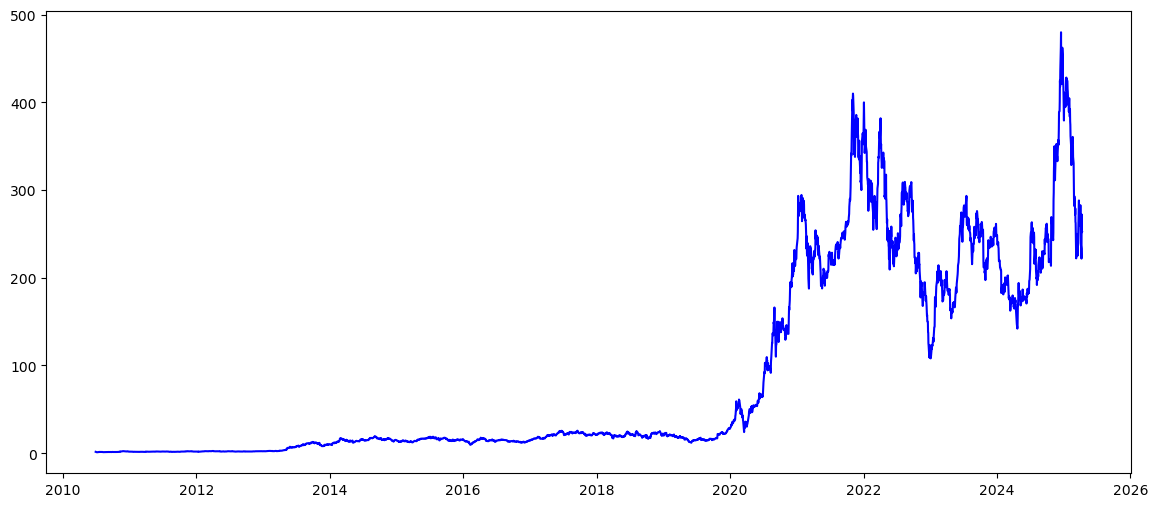

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt

tsla = yf.Ticker("TSLA")
tsla_hist = tsla.history(period="max")

plt.figure(figsize=(14,6))

plt.plot(tsla_hist.index, tsla_hist['Close'], label='Precio de acción (cierre)', color='blue')

plt.plot(df['Date'], df['Revenue'], label='Ingresos (en millones USD)', color='red')

plt.title('Tesla: Precio de acción vs Ingresos')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


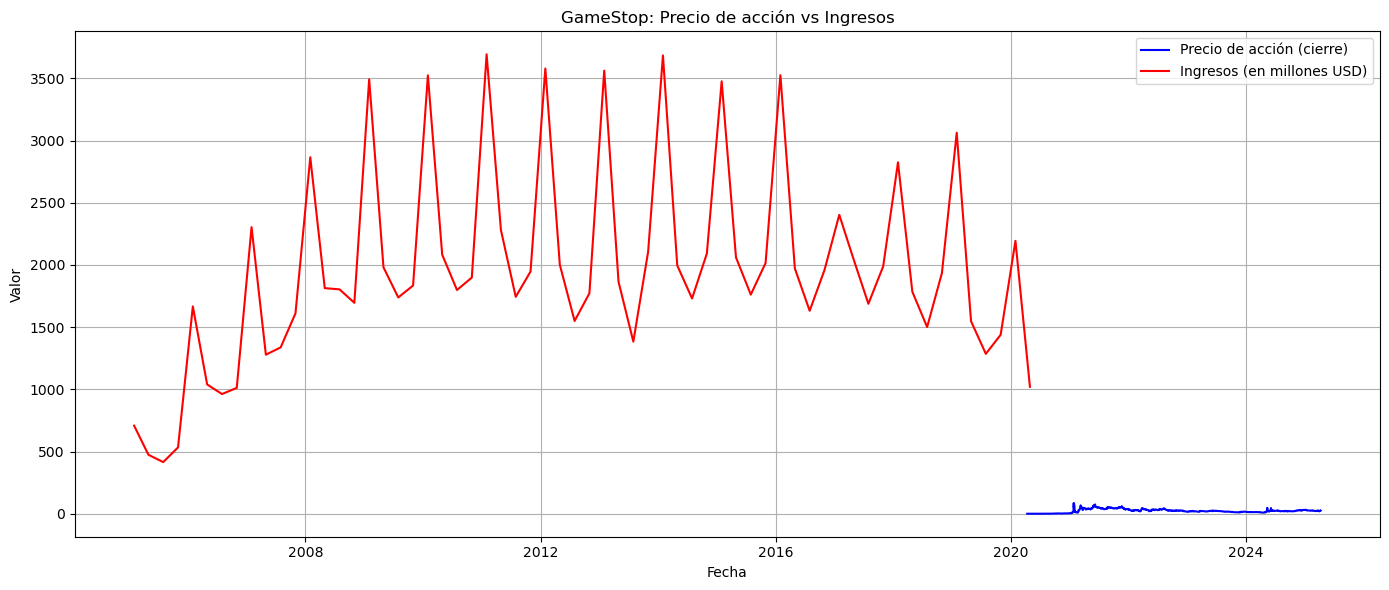

In [17]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
r = requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")


tables = soup.find_all("table")

df1 = pd.DataFrame()


for table in tables:
    if 'GameStop Quarterly Revenue' in table.text:
        df1 = pd.read_html(str(table))[0]
        break

if not df1.empty:
    df1.columns = ['Date', 'Revenue']
    df1 = df1[df1['Revenue'] != '']  
    df1['Date'] = pd.to_datetime(df1['Date'])  
    df1['Revenue'] = df1['Revenue'].replace('[\$,]', '', regex=True).astype(float)  
else:
    print("❌ No se encontró la tabla con los ingresos de GameStop.")


gamestop = yf.Ticker("GME")
gme_hist = gamestop.history(period="5y")


plt.figure(figsize=(14,6))

plt.plot(gme_hist.index, gme_hist['Close'], label='Precio de acción (cierre)', color='blue')


plt.plot(df1['Date'], df1['Revenue'], label='Ingresos (en millones USD)', color='red')


plt.title('GameStop: Precio de acción vs Ingresos')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
